# Market Reaction to the October 7, 2023 Conflict  
**Comprehensive Event Study of Currency and Equity Market Movements**

---

## 🧭 Project Overview
This notebook investigates how global and regional financial markets reacted to the outbreak of the **October 7, 2023 conflict**.  
The study focuses on the **short-term market response** by comparing the **U.S. Dollar Index (DXY)**, several **major currency pairs**, global equity indices, and the **Tehran Stock Exchange (TSE)** before and after the event.

The purpose is to visualize correlations, divergences, and market sensitivities through normalized comparative charts.

---

## 🎯 Objectives
1. Evaluate the **impact of geopolitical shocks** on currency and equity markets.  
2. Compare **safe-haven asset behavior** (USD) vs. **risk assets** (equities, emerging currencies).  
3. Examine whether **Iran’s domestic market** (TSE) follows or diverges from global financial patterns.  
4. Provide a clear **visual timeline** around the conflict start date (*October 7, 2023*).

---

## 🧩 Datasets and Sources
| Category | Source | Symbols / Methods |
|-----------|---------|-------------------|
| **Global Indices & FX** | Yahoo Finance (`yfinance`) | `DX-Y.NYB`, `CNYUSD=X`, `AEDUSD=X`, `SARUSD=X`, `IQDUSD=X`, `EURUSD=X`, `^GSPC`, `399001.SZ` |
| **Iranian Market Data** | `finpy_tse` | `Get_CWI_History` (TSE Index), `Get_USD_RIAL` (USD/IRR) |
| **Calendar Handling** | `jdatetime` | Conversion between Gregorian ↔ Jalali |
| **Note** | `SYPUSD=X` (Syrian Pound) was attempted but data was unavailable. |

---

## 📅 Analysis Parameters
```python
start = '2023-09-25'
end = '2023-10-13'
split_date = '2023-10-09'   # separation between pre-/post-conflict data


## Useful External Resources

The links below are reference sources used throughout this notebook for symbol lookup, quick chart validation, and cross-checking Iranian market specifics. We **do not scrape** these sites in code; data retrieval is handled via `yfinance` and `finpy_tse`.

- **TradingView (NASDAQ: TTOO):** Quick visual charts and price action context for U.S. tickers.
- **Yahoo Finance:** Primary source for global historical data accessed programmatically via `yfinance`.
- **TSETMC (Legacy):** Official Iranian market portal used to verify Tehran Stock Exchange tickers, trading calendars, and session details.


https://www.tradingview.com/symbols/NASDAQ-TTOO/

https://finance.yahoo.com/

http://old.tsetmc.com/Loader.aspx?ParTree=15  #for Iran



## Importing Required Libraries

This cell imports all the core Python libraries used in the analysis:

- **finpy_tse** → Accesses Tehran Stock Exchange data (indices, tickers, and USD/IRR rates).  
- **pandas** → Data manipulation and time-series handling.  
- **jdatetime** → Converts between Gregorian and Jalali calendars for Iranian market data.  
- **yfinance** → Fetches global financial data such as indices and currency pairs.  
- **matplotlib.pyplot / matplotlib.dates** → Visualization of time-series data with custom date formatting.  
- **numpy** → Numerical operations and normalization of datasets.

These libraries form the backbone of both **data collection** and **visualization** in this event study.


In [45]:
import finpy_tse as fpy
import pandas as pd
import jdatetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

## Defining the Time Period and Event Split Date

We first define the **observation window** and the **event date marker**.  
A one-month range is selected to capture short-term market reactions before and after the conflict.

- `start` → Beginning of the data window (`2023-09-25`)  
- `end` → End of the data window (`2023-10-13`)  
- `split_date` → The event boundary (`2023-10-09`), marking the first trading day after the start of the conflict.

> Note: October 7 and 8 were weekend days with no market activity, so the analysis begins from **October 9, 2023** as the effective "event day".


In [46]:
start='2023-09-25'
end='2023-10-13'
split_date = "2023-10-09"

## Tehran Stock Exchange (TSE) Index Analysis

In this section, we retrieve and visualize the **Tehran Stock Exchange (TSE)** main index to study its short-term performance around the conflict period.

- The date range is converted from **Gregorian** to **Jalali** using the `jdatetime` library, as `finpy_tse` operates with the Iranian calendar.
- `Get_CWI_History()` is used to fetch the **adjusted closing prices** for the defined period.
- The resulting time series is plotted to observe daily market movement trends.

**Observation:**  
Despite geopolitical tension, the TSE remained mostly **upward or stable**, except for a short dip immediately following the onset of the conflict.  
This is likely due to **policy-driven interventions** and **governmental market support**, which tend to stabilize or artificially sustain index performance during crises.


<Axes: xlabel='Date'>

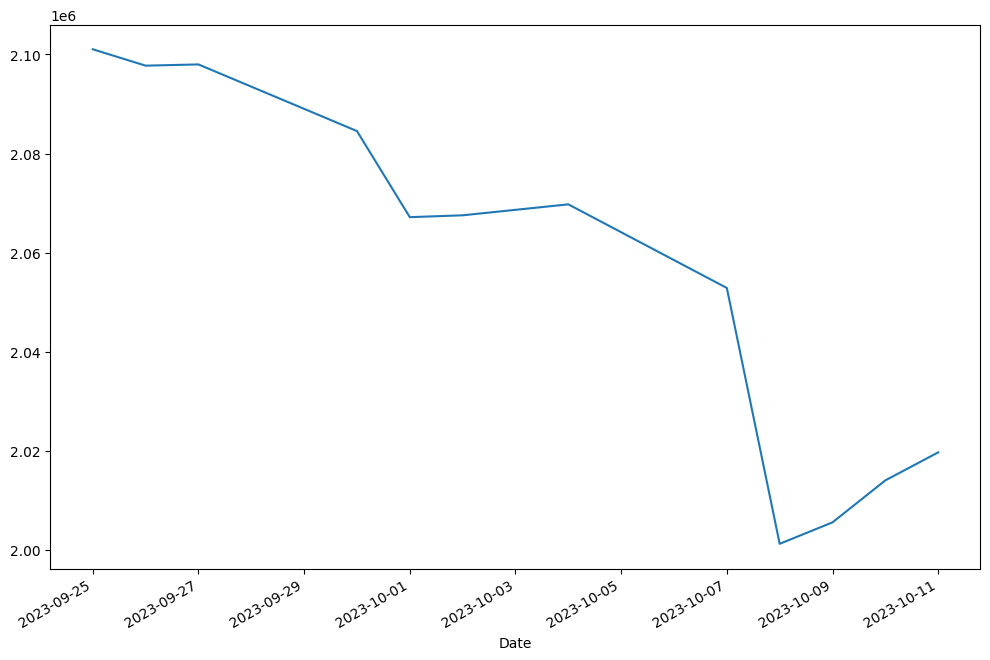

In [47]:
start_jalali = jdatetime.date.fromgregorian(date=pd.to_datetime(start)).strftime('%Y-%m-%d')
end_jalali = jdatetime.date.fromgregorian(date=pd.to_datetime(end)).strftime('%Y-%m-%d')

df_cwi_history = fpy.Get_CWI_History(start_date=start_jalali, end_date=end_jalali, ignore_date=False, 
                                     just_adj_close=True, show_weekday=False, double_date=True)
df_cwi_history.set_index('Date', inplace=True)
tse = df_cwi_history["Adj Close"]
plt.figure(figsize=(12, 8))
tse.plot()

****

## U.S. Dollar Index (DXY) Analysis

This section retrieves and visualizes the **U.S. Dollar Index (DXY)**, which measures the value of the U.S. dollar relative to a basket of six major foreign currencies:

- **EUR (Euro)**  
- **JPY (Japanese Yen)**  
- **GBP (British Pound)**  
- **CAD (Canadian Dollar)**  
- **SEK (Swedish Krona)**  
- **CHF (Swiss Franc)**  

Approximately **58% of the index weight** is based on the **EUR/USD** exchange rate, making the euro its most influential component.

**Interpretation:**  
The DXY serves as a benchmark for the dollar’s global strength.  
A **rise** in this index indicates **dollar appreciation** (stronger USD), while a **decline** signals **dollar weakness**.  
During the post-conflict period, the DXY increased slightly, reflecting a **“flight-to-safety”** trend as investors shifted capital toward the U.S. dollar amid geopolitical uncertainty.


C:\Users\razan\AppData\Local\Temp\ipykernel_15176\1549770115.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('DX-Y.NYB', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

<Figure size 1000x700 with 0 Axes>

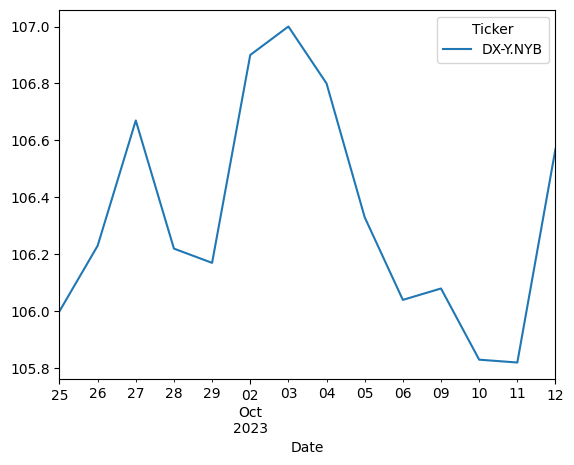

In [48]:
data = yf.download('DX-Y.NYB', start=start, end=end)
DXY = data["Close"]
plt.figure(figsize=(10, 7))
DXY.plot()

## Comparing the U.S. Dollar Index (DXY) with the Tehran Stock Exchange (TSE)

This section compares the **U.S. Dollar Index (DXY)** and the **Tehran Stock Exchange (TSE)** using normalized time-series data.

- The helper function `to_series()` ensures both datasets are properly formatted as `pandas.Series` with a timezone-free `DatetimeIndex`.  
- Data are **min–max normalized** to a [0, 1] scale to allow visual comparison of their relative movement, regardless of differing price levels.  
- The series are split at the event date (`split_date`) into *before* and *after* subsets, with the latter shown in **green**.  
- A vertical dashed line marks the conflict’s start to visualize market reactions around the event.

**Interpretation:**  
In crisis periods, Iranian investors typically seek **safe-haven assets**, primarily **USD** or **gold**, since the dollar is globally perceived as the most stable currency.  
Although DXY dipped briefly in the initial days following the conflict, it historically **recovers and strengthens** as global uncertainty rises.  
The short-term comparison here is limited because Iranian markets close on Thursdays and Fridays, creating slight data misalignment in the immediate post-event window.


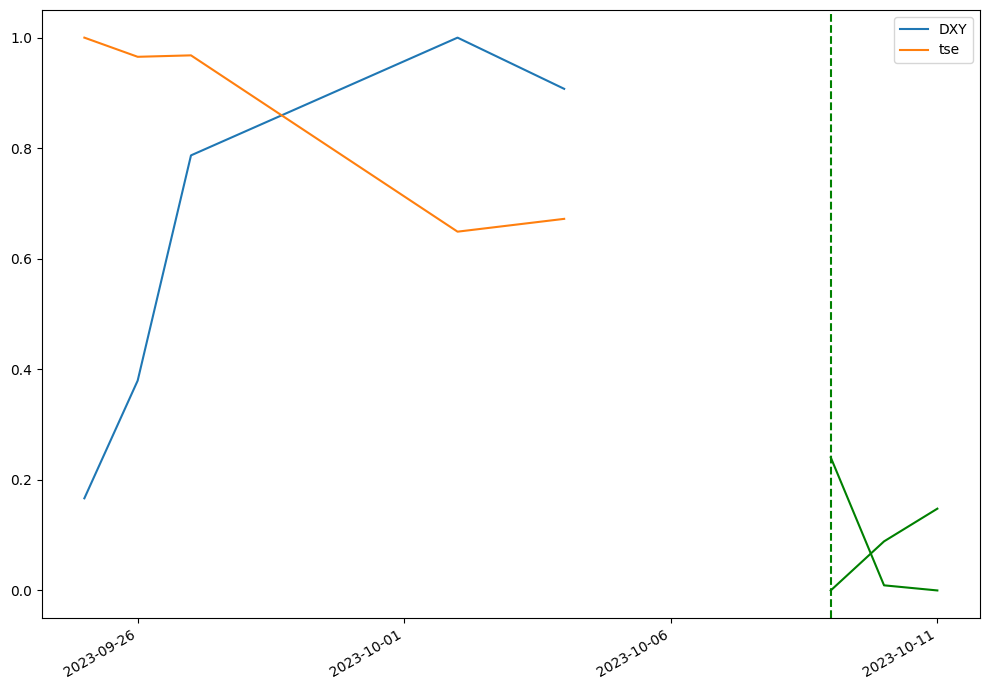

In [49]:
# — helper: safely convert any input to a pandas Series and make sure index is datetime without timezone
def to_series(x, name):
    if isinstance(x, pd.DataFrame):
        if x.shape[1] == 1:
            s = x.iloc[:, 0]
        else:
            raise ValueError(f"{name} has multiple columns; please select one (e.g., x['col']).")
    elif isinstance(x, pd.Series):
        s = x
    else:
        # handle numpy arrays of shape (n,1) or (n,)
        s = pd.Series(np.asarray(x).ravel())

    s.name = name

    # try to parse the index as datetime if possible
    if s.index.dtype == 'object' or np.issubdtype(getattr(s.index, 'dtype', object), np.object_):
        try:
            s.index = pd.to_datetime(s.index)
        except Exception:
            pass
    elif hasattr(s.index, 'tz'):
        try:
            s.index = s.index.tz_localize(None)
        except TypeError:
            pass

    # ensure datetime index without timezone
    try:
        s.index = pd.to_datetime(s.index)
        s.index = s.index.tz_localize(None)
    except Exception:
        pass

    return s

# — convert inputs safely to Series
DXY = to_series(DXY, 'DXY')
tse = to_series(tse, 'tse')

# — align both on their common index (use join='outer' if you want all dates instead)
df = pd.concat([DXY, tse], axis=1, join='inner').sort_index()
df.columns = ['DXY', 'tse']  # make sure columns are named correctly

# — Min–Max normalization (safe version, handles constant columns)
rng = df.max() - df.min()
rng = rng.replace(0, np.nan)
df_normalized = (df - df.min()) / rng
df_normalized = df_normalized.dropna()

# — split the data by split_date
split_ts = pd.to_datetime(split_date)

mask_before = df_normalized.index < split_ts
mask_after  = df_normalized.index >= split_ts

plt.figure(figsize=(10, 7))

# plot before and after split_date
for col in df_normalized.columns:
    # before split_date (default colors)
    plt.plot(df_normalized.index[mask_before],
             df_normalized.loc[mask_before, col],
             label=col)
    # after split_date (green color)
    plt.plot(df_normalized.index[mask_after],
             df_normalized.loc[mask_after, col],
             color='green')

# vertical line at split_date
plt.axvline(split_ts, color='g', linestyle='--')

plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


****

## CNY/USD Exchange Rate (Yuan quoted in USD)

This cell downloads and plots **`CNYUSD=X`**, i.e., the price of **1 Chinese yuan in U.S. dollars** (USD per CNY).  
Because **CNY is in the numerator** and **USD is in the denominator**, a **decline** in this series means **yuan weakness / dollar strength**; a **rise** means **yuan strength / dollar weakness**.

- Data source: `yfinance` (`CNYUSD=X`) over the same analysis window.  
- The green dashed line marks `split_date` (first trading day after the conflict start).  
- We use the *close* prices; `yfinance` may show a warning about `auto_adjust` defaults—this does not affect the interpretation here.

**Interpretation:**  
Immediately around the event, the yuan **spiked briefly** and then **fell**, consistent with a short-lived sentiment move followed by a **flight-to-safety into USD**.  
Structurally, China’s reliance on **Middle Eastern energy and raw materials** leaves CNY more exposed to regional disruption; hence **CNY tends to depreciate vs. USD** when geopolitical risk in the region rises.


C:\Users\razan\AppData\Local\Temp\ipykernel_15176\1076479182.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('CNYUSD=X', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

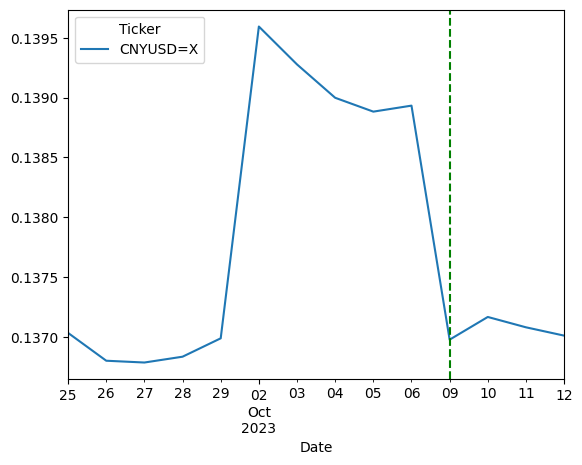

In [50]:
data = yf.download('CNYUSD=X', start=start, end=end)
yuan = data["Close"]
plt.figure(figsize=(12, 8))
yuan.plot()

plt.axvline(pd.to_datetime(split_date), color='g', linestyle='--')  



****

## Comparing Chinese Yuan (CNY/USD) with the Tehran Stock Exchange (TSE)

This cell compares the **Chinese Yuan (CNY/USD)** exchange rate and the **Tehran Stock Exchange (TSE)** index to observe how a major Asian currency and Iran’s domestic market reacted around the same geopolitical event.

- The helper function `to_series()` standardizes both datasets into timezone-free `pandas.Series` objects.  
- Both are aligned on their **common trading dates** and **normalized (0–1)** to visualize relative movement rather than absolute prices.  
- The green dashed line (`split_date`) separates pre- and post-conflict data.

**Interpretation:**  
Following the conflict’s outbreak, the **Yuan weakened against the USD** (reflected by a downward movement), while the **TSE index remained relatively stable**.  
This divergence reflects China’s **economic exposure to Middle Eastern raw materials** (especially oil and gas), whereas **Iran’s stock market**—domestically controlled—shows muted reaction due to limited global integration and **state-backed price support**.  
Overall, this chart highlights the **decoupling** between international market dynamics and Iran’s regulated domestic exchange.


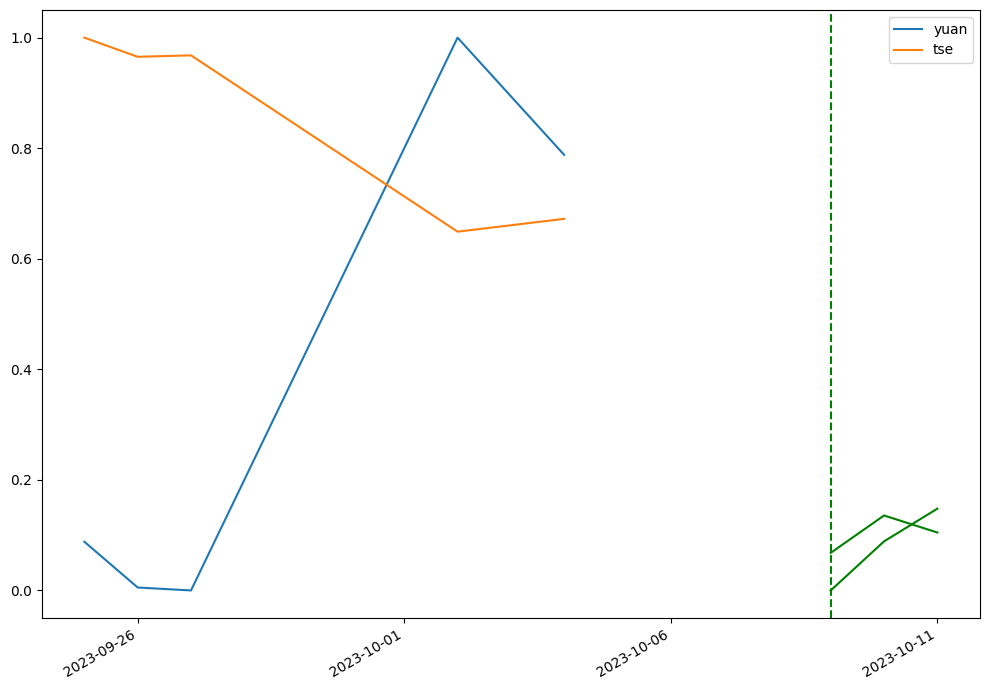

In [51]:
# Helper: safely turn any input (DataFrame/ndarray/Series) into a 1-D Series
# and ensure a timezone-free DatetimeIndex if possible.
def to_series(x, name):
    if isinstance(x, pd.DataFrame):
        if x.shape[1] == 1:
            s = x.iloc[:, 0]
        else:
            raise ValueError(f"{name} has multiple columns; pick one explicitly (e.g., x['Close']).")
    elif isinstance(x, pd.Series):
        s = x
    else:
        s = pd.Series(np.asarray(x).ravel())
    s.name = name

    # Try to coerce the index to tz-naive datetime
    try:
        s.index = pd.to_datetime(s.index)
        # If index already tz-aware, drop tz
        try:
            s.index = s.index.tz_localize(None)
        except (TypeError, AttributeError):
            pass
    except Exception:
        # If index cannot be parsed to datetime, leave as-is
        pass

    return s

# Convert inputs to Series and standardize their indexes
yuan = to_series(yuan, 'yuan')
tse  = to_series(tse,  'tse')

# Align on common dates (use join='outer' if you want the union; here we use inner to avoid NaNs)
df = pd.concat([yuan, tse], axis=1, join='inner').sort_index()
df.columns = ['yuan', 'tse']

# Safe Min–Max normalization (handles constant columns)
rng = df.max() - df.min()
rng = rng.replace(0, np.nan)
df_normalized = (df - df.min()) / rng
df_normalized = df_normalized.dropna()

# Split around split_date
split_ts = pd.to_datetime(split_date)
mask_before = df_normalized.index < split_ts
mask_after  = df_normalized.index >= split_ts

# Plot
plt.figure(figsize=(10, 7))
for col in df_normalized.columns:
    # before split_date: default colors + label
    plt.plot(df_normalized.index[mask_before],
             df_normalized.loc[mask_before, col],
             label=col)
    # after split_date: green
    plt.plot(df_normalized.index[mask_after],
             df_normalized.loc[mask_after, col],
             color='green')

# Vertical line at split_date
plt.axvline(split_ts, color='g', linestyle='--')

plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


****

The UAE dirham (AED), Saudi riyal (SAR), and Iraqi dinar (IQD) are pegged to the U.S. dollar, meaning their exchange rates are fixed or tightly linked to the value of the dollar over time.

In a currency peg system, the central bank maintains the domestic currency’s value within a narrow band relative to the U.S. dollar by buying or selling foreign reserves as needed. As a result, when the U.S. dollar depreciates, these pegged currencies also tend to decline in value relative to other currencies, and when the U.S. dollar appreciates, they rise correspondingly.

In essence, these currencies move in tandem with the dollar because their monetary authorities commit to maintaining a stable exchange rate against it.

چون هم اسکیل کردیم تغییرات جزئی قابل مشاهده هستند## AED/USD Exchange Rate — UAE Dirham Pegged to the U.S. Dollar

This section visualizes the **AED/USD** exchange rate, representing the **UAE Dirham** quoted in **U.S. dollars**.

- Data are retrieved via `yfinance` (`AEDUSD=X`) over the defined observation window.  
- Because the UAE dirham is **officially pegged to the U.S. dollar**, only **tiny fluctuations** are visible after normalization and scaling.

**Interpretation:**  
The United Arab Emirates maintains a **fixed exchange rate system**, with the dirham tightly pegged to the U.S. dollar at roughly **3.6725 AED per USD**.  
This stability arises from the UAE’s **large dollar reserves** and **oil revenues**—oil exports are priced in USD, ensuring abundant dollar inflows.  
Consequently, even during geopolitical shocks, the AED/USD pair remains nearly flat, showing **no independent reaction** to market volatility.  
Minor visible variations are due to **rounding and trading hour differences**, not true market movement.


C:\Users\razan\AppData\Local\Temp\ipykernel_15176\826043702.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AEDUSD=X', start=start, end=end)
[*********************100%***********************]  1 of 1 completed

<Axes: xlabel='Date'>

<Figure size 1200x800 with 0 Axes>

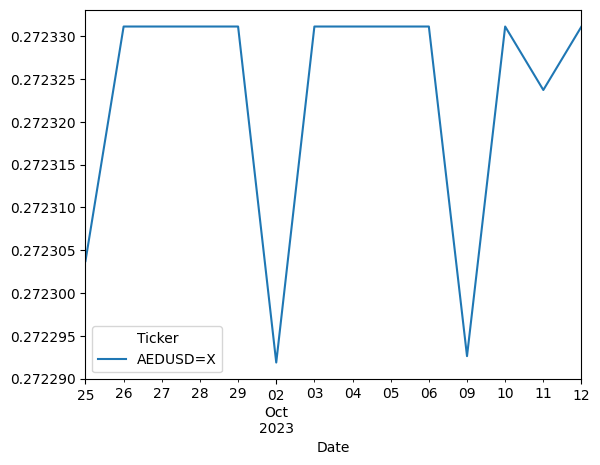

In [52]:
data = yf.download('AEDUSD=X', start=start, end=end)
dirham = data["Close"]
plt.figure(figsize=(12, 8))
dirham.plot()

****

## Comparing AED/USD (UAE Dirham) with the Tehran Stock Exchange (TSE)

This section compares the **UAE Dirham (AED/USD)** exchange rate—pegged to the U.S. dollar—with the **Tehran Stock Exchange (TSE)** index to illustrate how a currency under a fixed regime behaves relative to a semi-managed emerging market.

- Both time series (`dirham` and `tse`) are converted to timezone-free `pandas.Series` objects.  
- Data are aligned on **common trading dates**, normalized to a [0–1] scale, and split around the `split_date` event marker.  
- The pre-event period appears in default colors, and post-event data in **green**.

**Interpretation:**  
Because the **AED is pegged to the USD**, its chart shows almost **no volatility**—tiny oscillations reflect technical rounding rather than market shifts.  
In contrast, the **Tehran Stock Exchange** exhibits mild downward movement during the conflict, followed by recovery.  
The stability of AED/USD underscores how **oil-exporting Gulf economies**, with strong USD reserves, maintain **currency stability** even amid geopolitical tension.  
This comparison highlights the **insulation of pegged currencies** from crisis-driven global currency fluctuations.


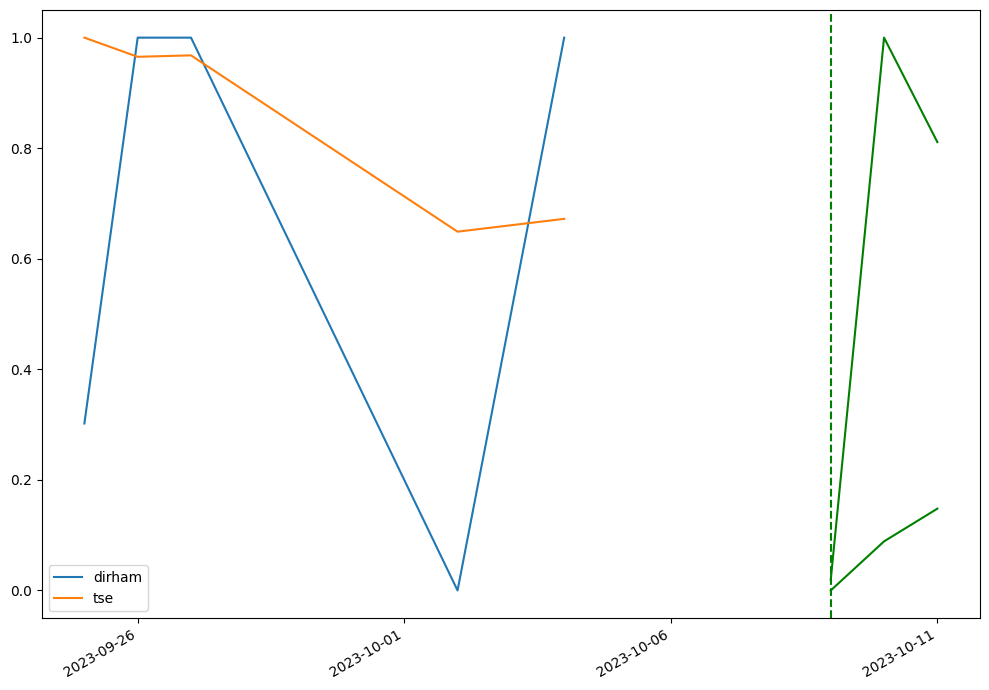

In [53]:
# 1) Ensure 1-D Series
if isinstance(dirham, pd.DataFrame):
    dirham = dirham.squeeze("columns")      # or: dirham = dirham.iloc[:, 0]
if isinstance(tse, pd.DataFrame):
    tse = tse.squeeze("columns")            # or: tse = tse.iloc[:, 0]

# 2) Make tz-naive DatetimeIndex
dirham.index = pd.to_datetime(dirham.index).tz_localize(None)
tse.index    = pd.to_datetime(tse.index).tz_localize(None)

# 3) Align on common dates and build DataFrame
df = pd.concat(
    [dirham.rename('dirham'), tse.rename('tse')],
    axis=1, join='inner'                    # use 'outer' if you want the union of dates
).sort_index()

# 4) Safe Min–Max normalization
rng = df.max() - df.min()
rng = rng.replace(0, np.nan)                # avoid divide-by-zero on flat series
df_normalized = (df - df.min()) / rng
df_normalized = df_normalized.dropna()

# 5) Split and plot
split_ts = pd.to_datetime(split_date)
mask_before = df_normalized.index < split_ts
mask_after  = df_normalized.index >= split_ts

plt.figure(figsize=(10, 7))
for col in df_normalized.columns:
    plt.plot(df_normalized.index[mask_before],
             df_normalized.loc[mask_before, col],
             label=col)
    plt.plot(df_normalized.index[mask_after],
             df_normalized.loc[mask_after, col],
             color='green')

plt.axvline(split_ts, color='g', linestyle='--')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


****

## SAR/USD Exchange Rate — Saudi Riyal Pegged to the U.S. Dollar

This plot shows the **Saudi Riyal (SAR/USD)** exchange rate during the observation window.  
The pair represents the value of **1 Saudi Riyal in U.S. dollars**, retrieved from Yahoo Finance (`SARUSD=X`).

**Key Notes:**
- Saudi Arabia maintains a **strict currency peg** at approximately **3.75 SAR per USD** (or ~0.2667 USD per SAR).  
- Because of this fixed rate regime, fluctuations are **minimal** and only reflect minor technical adjustments or market micro-noise.  
- The country’s **large foreign exchange reserves** and **massive USD inflows from oil exports** allow the Saudi Central Bank to sustain this peg under almost any condition.

**Interpretation:**  
As visible in the chart, the SAR/USD pair remains nearly flat—hovering around one-third of a U.S. dollar—demonstrating **complete stability** despite the regional conflict.  
This stability underlines Saudi Arabia’s **monetary strength and oil-backed dollar reserves**, insulating its currency from global or regional shocks.


C:\Users\razan\AppData\Local\Temp\ipykernel_15176\3788951094.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('SARUSD=X', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

<Figure size 1200x800 with 0 Axes>

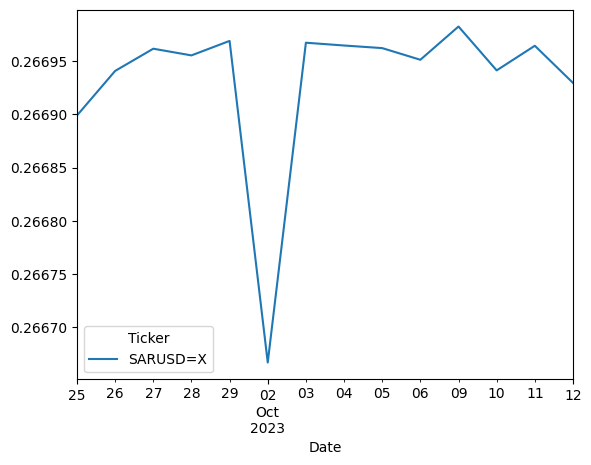

In [54]:
data = yf.download('SARUSD=X', start=start, end=end)
saudi_rial = data["Close"]
plt.figure(figsize=(12, 8))
saudi_rial.plot()

## Comparing SAR/USD (Saudi Riyal) with the Tehran Stock Exchange (TSE)

This cell contrasts a **pegged currency** (Saudi Riyal, `SARUSD=X`) with the **Tehran Stock Exchange** to show how a fixed FX regime behaves next to a semi-managed equity market.

- Convert both series to 1-D, **tz-naive** `DatetimeIndex`.
- Align on **common trading days**, then **min–max normalize** to [0, 1] for a like-for-like visual comparison.
- Split at `split_date` (green dashed line): pre-event in default colors, post-event in **green**.

**Interpretation:**  
Because **SAR is tightly pegged to USD (~0.2667 USD per SAR / 3.75 SAR per USD)**, it exhibits **near-zero volatility** even amid geopolitical stress.  
The **TSE** shows a mild dip around the event and a subsequent recovery—behavior consistent with **domestic policy support** and limited global linkage.  
The chart highlights the **stability of a hard peg** versus the **managed but more flexible** nature of Iran’s equity market.


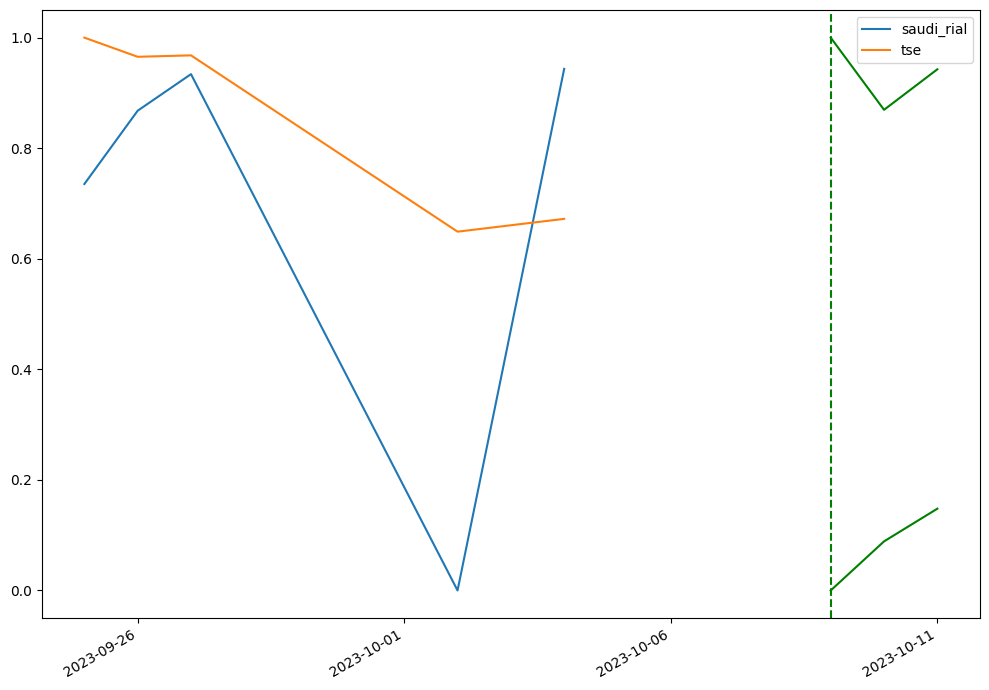

In [55]:
# 1) Ensure 1-D Series (squeeze a 1-col DataFrame)
if isinstance(saudi_rial, pd.DataFrame):
    saudi_rial = saudi_rial.squeeze("columns")     # or: saudi_rial = saudi_rial.iloc[:, 0]
if isinstance(tse, pd.DataFrame):
    tse = tse.squeeze("columns")                   # or: tse = tse.iloc[:, 0]

# 2) Datetime index (tz-naive)
saudi_rial.index = pd.to_datetime(saudi_rial.index).tz_localize(None)
tse.index        = pd.to_datetime(tse.index).tz_localize(None)

# 3) Align on common dates and build DataFrame
df = pd.concat(
    [saudi_rial.rename('saudi_rial'), tse.rename('tse')],
    axis=1, join='inner'                           # use 'outer' to keep the union of dates
).sort_index()

# 4) Safe Min–Max normalization
rng = df.max() - df.min()
rng = rng.replace(0, np.nan)                       # avoid /0 for flat series
df_normalized = (df - df.min()) / rng
df_normalized = df_normalized.dropna()

# 5) Split and plot
split_ts = pd.to_datetime(split_date)
mask_before = df_normalized.index < split_ts
mask_after  = df_normalized.index >= split_ts

plt.figure(figsize=(10, 7))
for col in df_normalized.columns:
    plt.plot(df_normalized.index[mask_before],
             df_normalized.loc[mask_before, col],
             label=col)
    plt.plot(df_normalized.index[mask_after],
             df_normalized.loc[mask_after, col],
             color='green')

plt.axvline(split_ts, color='g', linestyle='--')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


****

## IQD/USD (Iraqi Dinar) and its Comparison with the Tehran Stock Exchange (TSE)

This section (1) downloads and plots **`IQDUSD=X`** — the value of **1 Iraqi dinar in U.S. dollars** — and (2) compares the series against the **TSE index** on a normalized scale.

### What the code does
- **Fetch data** from Yahoo Finance for `IQDUSD=X` and extract the `Close` series.  
- **Standardize** both series (IQD and TSE) to 1-D `pandas.Series` with **tz-naive** `DatetimeIndex`.  
- **Align on common trading days** and apply **Min–Max normalization** so movements are comparable despite different units.  
- **Segment** the timeline at `split_date` (green dashed line): pre-event in default colors, post-event in **green**.  
- **Plot** the IQD series alone (top chart) and then the **IQD vs. TSE** normalized comparison (bottom chart).

### Interpretation
- The Iraqi dinar operates under a **de facto peg / managed regime** versus the USD, so day-to-day changes are **very small**; apparent jumps often reflect **low liquidity, settlement conventions, or holiday gaps** rather than genuine re-pricing.  
- Around the event window, IQD remains **near-flat**, consistent with administrative control and USD supply from oil revenues.  
- The **TSE** shows a brief dip followed by **policy-supported stabilization**, highlighting how a **managed FX** (IQD) and a **semi-managed equity market** (TSE) can both appear insulated from immediate global risk-off dynamics—albeit for different reasons (FX peg vs. domestic market interventions).


C:\Users\razan\AppData\Local\Temp\ipykernel_15176\759048027.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('IQDUSD=X', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

<Figure size 1200x800 with 0 Axes>

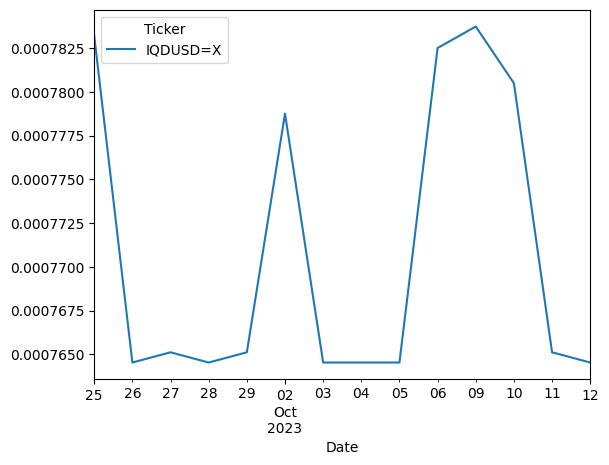

In [56]:
data = yf.download('IQDUSD=X', start=start, end=end)
Dinar = data["Close"]
plt.figure(figsize=(12, 8))
Dinar.plot()

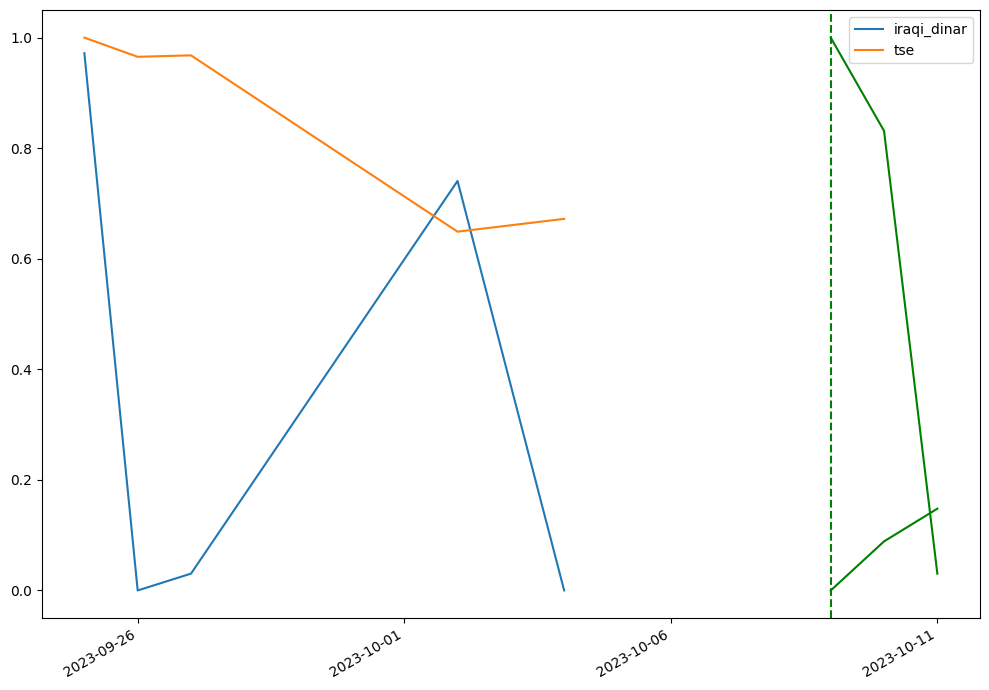

In [57]:
# 1) Ensure 1-D Series (squeeze 1-col DataFrames)
if isinstance(Dinar, pd.DataFrame):
    Dinar = Dinar.squeeze("columns")          # or: Dinar = Dinar.iloc[:, 0]
if isinstance(tse, pd.DataFrame):
    tse = tse.squeeze("columns")              # or: tse = tse.iloc[:, 0]

# 2) Use tz-naive DatetimeIndex
Dinar.index = pd.to_datetime(Dinar.index).tz_localize(None)
tse.index   = pd.to_datetime(tse.index).tz_localize(None)

# 3) Align on common dates and build DataFrame
df = pd.concat(
    [Dinar.rename('iraqi_dinar'), tse.rename('tse')],
    axis=1, join='inner'                      # use 'outer' if you want the union of dates
).sort_index()

# 4) Safe Min–Max normalization
rng = df.max() - df.min()
rng = rng.replace(0, np.nan)                  # avoid division by zero for flat series
df_normalized = (df - df.min()) / rng
df_normalized = df_normalized.dropna()

# 5) Split and plot
split_ts = pd.to_datetime(split_date)
mask_before = df_normalized.index < split_ts
mask_after  = df_normalized.index >= split_ts

plt.figure(figsize=(10, 7))
for col in df_normalized.columns:
    # before split_date: default colors + label
    plt.plot(df_normalized.index[mask_before],
             df_normalized.loc[mask_before, col],
             label=col)
    # after split_date: green
    plt.plot(df_normalized.index[mask_after],
             df_normalized.loc[mask_after, col],
             color='green')

plt.axvline(split_ts, color='g', linestyle='--')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


****

## SYP/USD Exchange Rate (Syrian Pound) — Data Availability Note

This cell attempts to fetch **`SYPUSD=X`** (price of **1 Syrian pound in U.S. dollars**) from Yahoo Finance via `yfinance`.  
For the specified window (`2023-09-25` → `2023-10-13`), Yahoo returns **no data** and raises:

> `YFPricesMissingError: possibly delisted; no price data found`

This is expected: Syrian pound series are **often unavailable** or **sporadically published** on major data vendors due to **capital controls, sanctions, and illiquid/dual markets** (official vs. parallel).

**What this means for the analysis**
- The series cannot be plotted or compared in a reliable way for this period.
- To keep the workflow robust, you should **guard** this step and **skip plotting** when the download is empty.

**Suggested robust pattern**
```python
try:
    data = yf.download("SYPUSD=X", start=start, end=end, progress=False)
    if data is not None and not data.empty:
        Syrian_Pound = data["Close"]
        Syrian_Pound.plot()
    else:
        print("SYPUSD=X unavailable for this window; skipping plot.")
except Exception as e:
    print(f"SYPUSD=X fetch failed: {e}")


C:\Users\razan\AppData\Local\Temp\ipykernel_15176\3518703021.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('SYPUSD=X', start=start, end=end)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SYPUSD=X']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-09-25 -> 2023-10-13)')


<Axes: xlabel='Date'>

<Figure size 1200x800 with 0 Axes>

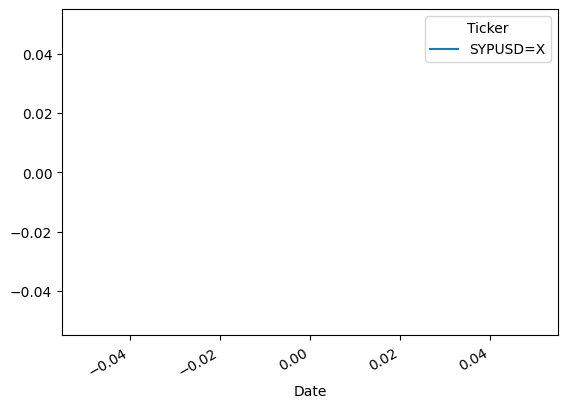

In [58]:
data = yf.download('SYPUSD=X', start=start, end=end)
Syrian_Pound = data["Close"]
plt.figure(figsize=(12, 8))
Syrian_Pound.plot()

****

## Shenzhen Stock Exchange Index (399001.SZ) — Comparison with Tehran Stock Exchange (TSE)

This section analyzes the **Shenzhen Composite Index (399001.SZ)** to observe how China’s equity market reacted to the October 2023 conflict, and compares its short-term pattern with the **Tehran Stock Exchange (TSE)**.

### Code overview
- Download daily **closing prices** of the Shenzhen index via `yfinance`.  
- Plot the time series with a **vertical green line** at `split_date` (the event marker).  
- Convert both `chenzhen` and `tse` data to **timezone-free Series**, align their trading dates, and apply **Min–Max normalization**.  
- Split and color data before and after the event for visual contrast.

### Interpretation
- Immediately after the event, Shenzhen’s market showed **a brief dip followed by a rebound**, but this recovery is not necessarily structural—it likely reflects **short-term volatility and thin post-holiday trading**.  
- If the conflict were to persist, the Shenzhen index would likely **decline further**, similar to the yuan, due to China’s **heavy dependence on Middle Eastern crude oil and raw material imports**.  
- The **Tehran Stock Exchange**, in contrast, remains more stable, influenced primarily by **domestic fiscal policy** rather than international market sentiment.  
- The correlation here emphasizes how **China’s equity market** reacts more directly to **commodity and geopolitical supply risks**, while **Iran’s market** exhibits a **policy-buffered behavior** with limited external linkage.

**Conclusion:**  
The short observation window shows only early-stage volatility, but structural logic suggests that a prolonged Middle Eastern conflict would pressure both the **Chinese yuan and Shenzhen equities**, reflecting their shared sensitivity to energy supply disruptions.


C:\Users\razan\AppData\Local\Temp\ipykernel_15176\1539880236.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('399001.SZ', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

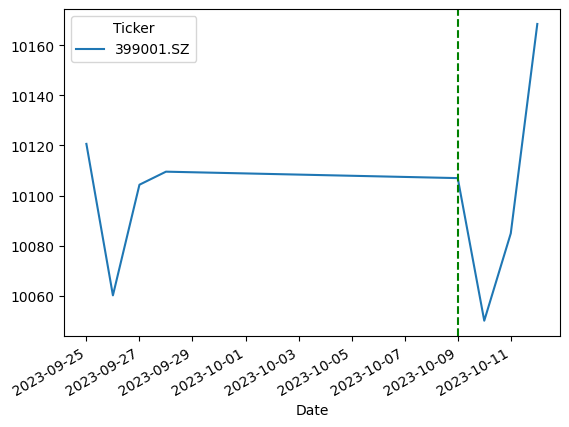

In [59]:
data = yf.download('399001.SZ', start=start, end=end)
chenzhen = data["Close"]
plt.figure(figsize=(12, 8))
chenzhen.plot()

plt.axvline(pd.to_datetime(split_date), color='g', linestyle='--')  

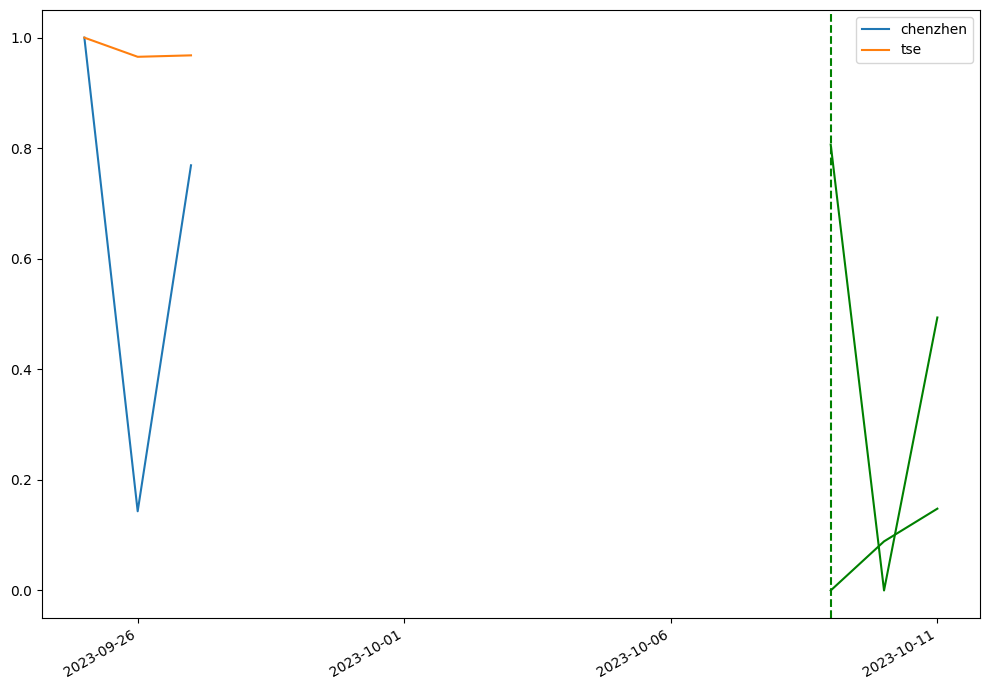

In [60]:
# 1) Ensure 1-D Series (squeeze 1-col DataFrames)
if isinstance(chenzhen, pd.DataFrame):
    chenzhen = chenzhen.squeeze("columns")       # or: chenzhen = chenzhen.iloc[:, 0]
if isinstance(tse, pd.DataFrame):
    tse = tse.squeeze("columns")                 # or: tse = tse.iloc[:, 0]

# 2) Make tz-naive DatetimeIndex
chenzhen.index = pd.to_datetime(chenzhen.index).tz_localize(None)
tse.index      = pd.to_datetime(tse.index).tz_localize(None)

# 3) Align on common dates and build DataFrame
df = pd.concat(
    [chenzhen.rename('chenzhen'), tse.rename('tse')],
    axis=1, join='inner'                         # use 'outer' if you want union of dates
).sort_index()

# 4) Safe Min–Max normalization
rng = df.max() - df.min()
rng = rng.replace(0, np.nan)                     # avoid division by zero for flat series
df_normalized = (df - df.min()) / rng
df_normalized = df_normalized.dropna()

# 5) Split and plot
split_ts = pd.to_datetime(split_date)
mask_before = df_normalized.index < split_ts
mask_after  = df_normalized.index >= split_ts

plt.figure(figsize=(10, 7))
for col in df_normalized.columns:
    # before split_date: default colors + label
    plt.plot(df_normalized.index[mask_before],
             df_normalized.loc[mask_before, col],
             label=col)
    # after split_date: green
    plt.plot(df_normalized.index[mask_after],
             df_normalized.loc[mask_after, col],
             color='green')

plt.axvline(split_ts, color='g', linestyle='--')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


****

## S&P 500 Index (^GSPC) — Comparison with Tehran Stock Exchange (TSE)

This section analyzes the **S&P 500 index**, the benchmark of the U.S. stock market, and compares its normalized movement with Iran’s **Tehran Stock Exchange (TSE)**.

### Code summary
- Downloads `^GSPC` from Yahoo Finance using `yfinance`.
- Converts both `sp500` and `tse` series to timezone-free `DatetimeIndex`.
- Aligns dates and applies **Min–Max normalization** so both can be compared on the same scale.
- Splits the timeline at `split_date`, marking the event (green dashed line) to highlight pre- and post-event differences.

### Interpretation
- The **S&P 500** fell slightly in the first days of the event, followed by a **strong rebound**. This short-term recovery is typical of U.S. equities during early geopolitical shocks—investors often buy the dip once risk is priced in.
- The **Tehran Stock Exchange** shows a flatter reaction, largely due to domestic market interventions and limited foreign investor exposure.
- A key macro relationship holds:  
  > **When the U.S. dollar strengthens, risk assets like stocks tend to weaken.**  
  This inverse relationship exists because a stronger dollar tightens global financial conditions, making U.S. exports more expensive and lowering corporate earnings.

### Summary insight
- **DXY ↑ → S&P 500 ↓ → Global risk-off sentiment.**
- **Iranian equities** remain decoupled in the short run due to **policy-driven pricing** and **capital flow restrictions**, not because they are resilient economically.
- Sustained dollar strength would likely weigh on global equities, while TSE’s stability may persist artificially until fundamental pressures (inflation, liquidity) reassert themselves.

**Conclusion:**  
The brief rise in the S&P 500 after the initial shock does not indicate risk resolution—it’s a **technical rebound** within a larger **inverse dollar–equity correlation** framework.


C:\Users\razan\AppData\Local\Temp\ipykernel_15176\2719177891.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

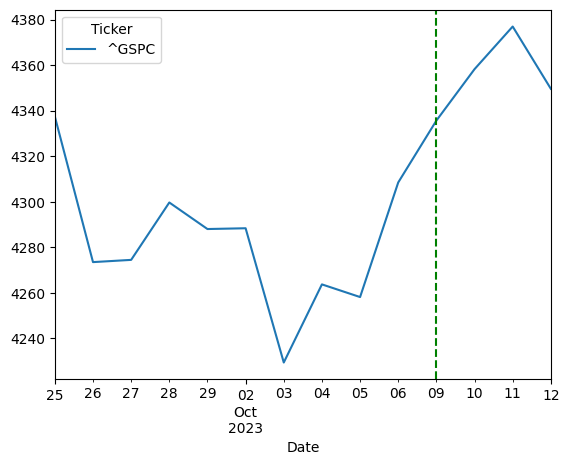

In [61]:
data = yf.download('^GSPC', start=start, end=end)
sp500 = data["Close"]
plt.figure(figsize=(12, 8))
sp500.plot()


plt.axvline(pd.to_datetime(split_date), color='g', linestyle='--')  

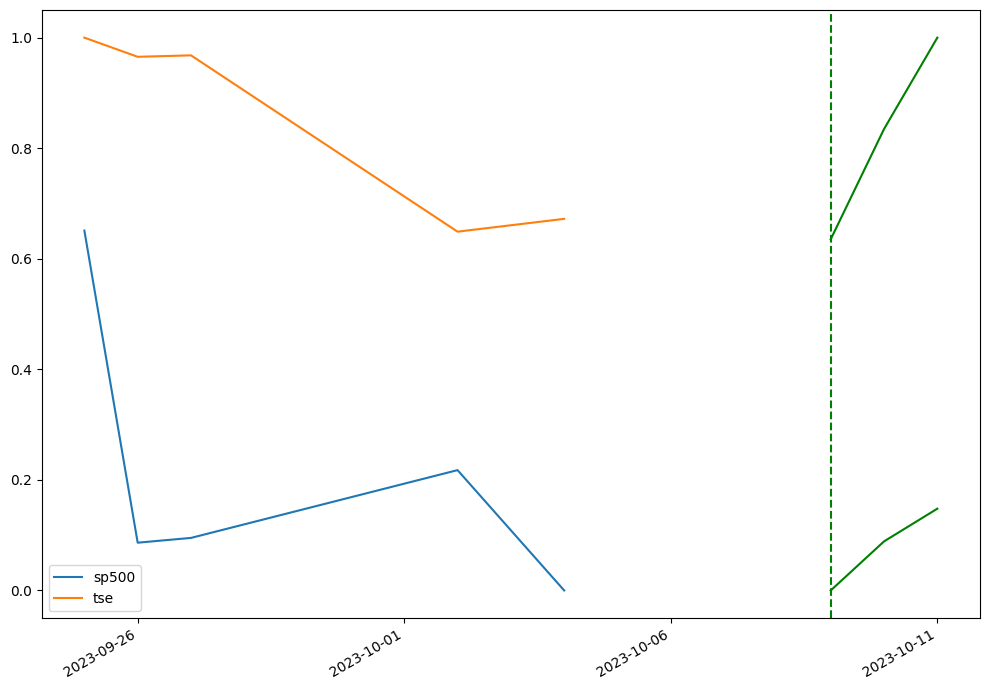

In [62]:
# 1) Ensure 1-D Series
if isinstance(sp500, pd.DataFrame):
    # if it came from yfinance, you might also do: sp500 = sp500['Close']
    sp500 = sp500.squeeze("columns")          # or: sp500 = sp500.iloc[:, 0]
if isinstance(tse, pd.DataFrame):
    tse = tse.squeeze("columns")              # or: tse = tse.iloc[:, 0]

# 2) Datetime index (tz-naive)
sp500.index = pd.to_datetime(sp500.index).tz_localize(None)
tse.index   = pd.to_datetime(tse.index).tz_localize(None)

# 3) Align on common dates and build DataFrame
df = pd.concat(
    [sp500.rename('sp500'), tse.rename('tse')],
    axis=1, join='inner'                      # use 'outer' to keep the union of dates
).sort_index()

# 4) Safe Min–Max normalization
rng = df.max() - df.min()
rng = rng.replace(0, np.nan)                  # avoid /0 on flat series
df_normalized = (df - df.min()) / rng
df_normalized = df_normalized.dropna()

# 5) Split and plot
split_ts = pd.to_datetime(split_date)
mask_before = df_normalized.index < split_ts
mask_after  = df_normalized.index >= split_ts

plt.figure(figsize=(10, 7))
for col in df_normalized.columns:
    # before split_date: default colors + label
    plt.plot(df_normalized.index[mask_before],
             df_normalized.loc[mask_before, col],
             label=col)
    # after split_date: green
    plt.plot(df_normalized.index[mask_after],
             df_normalized.loc[mask_after, col],
             color='green')

plt.axvline(split_ts, color='g', linestyle='--')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


****

## EUR/USD Exchange Rate — Comparison with Tehran Stock Exchange (TSE)

This section examines the **Euro–U.S. Dollar pair (EUR/USD)** to assess how the European currency behaved during the conflict period and compares it to Iran’s **Tehran Stock Exchange (TSE)**.

### Code explanation
- The code fetches `EURUSD=X` from Yahoo Finance using `yfinance`.
- Converts both `euro` and `tse` data into timezone-free Series and aligns them on common trading dates.
- Applies **Min–Max normalization** for visual comparability.
- The vertical green line (`split_date`) marks the start of the geopolitical event (October 9, 2023).

### Interpretation
- The **Euro initially declined** before the split date and showed a mild recovery afterward.
- This short rebound likely reflects temporary **market optimism** or **technical correction**, but structurally, the euro faces **downward pressure** if the conflict prolongs.
- Europe is **heavily dependent on Middle Eastern and Russian energy supplies**, particularly natural gas and oil.  
  Therefore, heightened geopolitical tension in that region increases **energy costs** and **economic uncertainty** in the Eurozone.
- In contrast, the **TSE index** remains relatively stable due to domestic monetary interventions and limited integration with global markets.

### Economic insight
- The **EUR/USD pair** generally moves **inversely to the U.S. Dollar Index (DXY)**.  
  When global risk increases, investors seek the **U.S. dollar as a safe haven**, leading to **a stronger USD** and **a weaker euro**.
- Thus, the early post-conflict rise of EUR/USD may not sustain; fundamentals still favor the dollar in periods of risk aversion.

### Summary
- **Before event:** Euro weakens amid rising geopolitical tension.  
- **After event:** Slight rebound but vulnerable to further decline if energy risks persist.  
- **Compared to TSE:** The euro’s movement reflects **external macro risks**, while Iran’s market reflects **policy-driven insulation** rather than economic stability.

**Conclusion:**  
If the Middle Eastern conflict continues, Europe’s dependence on imported energy will likely push the **euro downward against the dollar**, reinforcing the dollar’s role as the global safe-haven currency.


C:\Users\razan\AppData\Local\Temp\ipykernel_15176\1519482680.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('EURUSD=X', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

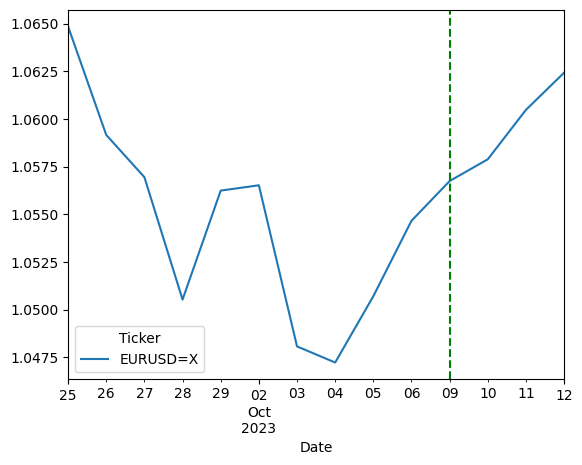

In [63]:
data = yf.download('EURUSD=X', start=start, end=end)
euro = data["Close"]
plt.figure(figsize=(12, 8))
euro.plot()


plt.axvline(pd.to_datetime(split_date), color='g', linestyle='--')  

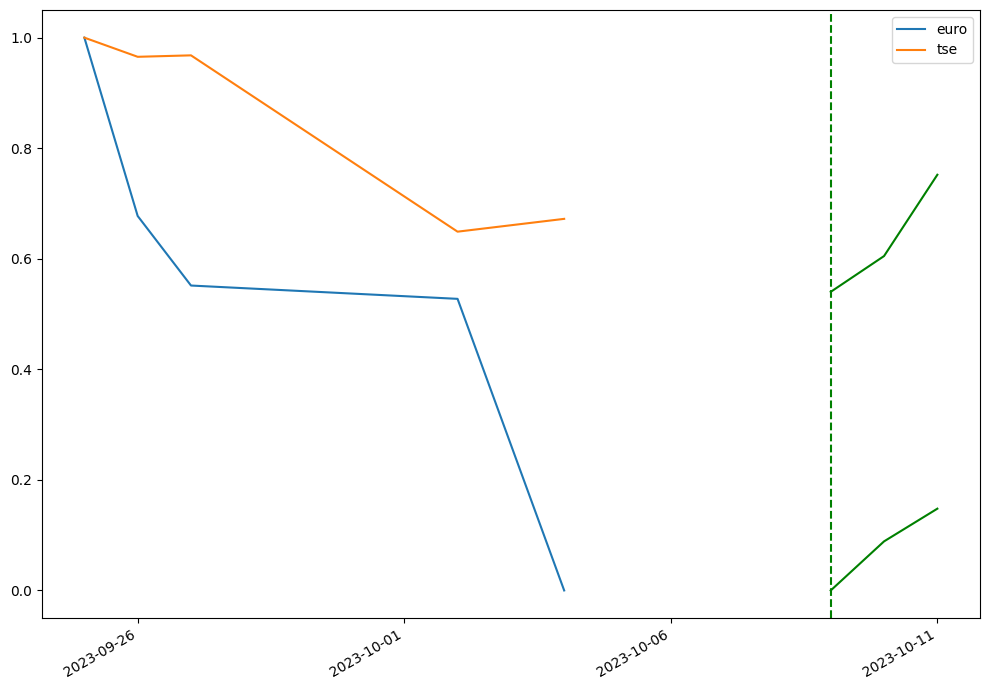

In [64]:
# 1) Ensure both are 1-D Series
if isinstance(euro, pd.DataFrame):
    euro = euro.squeeze("columns")            # or euro = euro.iloc[:, 0]
if isinstance(tse, pd.DataFrame):
    tse = tse.squeeze("columns")              # or tse = tse.iloc[:, 0]

# 2) Convert index to timezone-naive datetime
euro.index = pd.to_datetime(euro.index).tz_localize(None)
tse.index  = pd.to_datetime(tse.index).tz_localize(None)

# 3) Combine on common dates (use 'outer' if you want all)
df = pd.concat(
    [euro.rename('euro'), tse.rename('tse')],
    axis=1, join='inner'
).sort_index()

# 4) Safe Min–Max normalization
rng = df.max() - df.min()
rng = rng.replace(0, np.nan)                  # avoid divide-by-zero
df_normalized = (df - df.min()) / rng
df_normalized = df_normalized.dropna()

# 5) Split into pre/post split_date
split_ts = pd.to_datetime(split_date)
mask_before = df_normalized.index < split_ts
mask_after  = df_normalized.index >= split_ts

# 6) Plot
plt.figure(figsize=(10, 7))
for col in df_normalized.columns:
    plt.plot(df_normalized.index[mask_before],
             df_normalized.loc[mask_before, col],
             label=col)
    plt.plot(df_normalized.index[mask_after],
             df_normalized.loc[mask_after, col],
             color='green')

plt.axvline(split_ts, color='g', linestyle='--')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


****

## USD/IRR (Iranian Rial) — Official Rate via `finpy_tse` + Context vs. Other Markets

This cell retrieves the **official USD/IRR exchange rate** for Iran from `finpy_tse` and plots it over the event window.

### What the code does
- Converts the global `start`/`end` dates from **Gregorian to Jalali** (`jdatetime`) because `finpy_tse` expects Iranian calendar inputs.
- Calls `fpy.Get_USD_RIAL(...)`, sets the `Date` column as the index, and plots the **USD/IRR** series (higher values = **weaker rial**).
- In the second block (below), we keep the same normalization workflow to compare another FX series (here **EUR/USD**) to **TSE** for parity with earlier charts.

### How to read the chart
- **Upward moves** mean the **U.S. dollar strengthens vs. the rial** (rial depreciation).
- **Downward moves** mean **rial strengthening** (often short-lived or policy-driven).

### Interpretation
- Around the conflict window, USD/IRR shows a **sharp run-up** followed by a **pullback**, consistent with:
  1) an initial **risk-off spike** into USD, and  
  2) **domestic policy actions** and liquidity measures that temporarily stabilize the official rate.
- The official rate is **administered** and can diverge from **parallel/market rates**; therefore it may understate true FX pressure in stress episodes.
- Holidays and different trading calendars (Iran vs. global markets) introduce **gaps** and slight **timing offsets** relative to other series.

> Note: The second figure in this cell re-plots a **normalized EUR/USD vs. TSE** comparison using the same pre/post split (+ green post-event segment). It is kept to mirror the methodology used for other FX–equity comparisons in the notebook.


<Axes: xlabel='Date'>

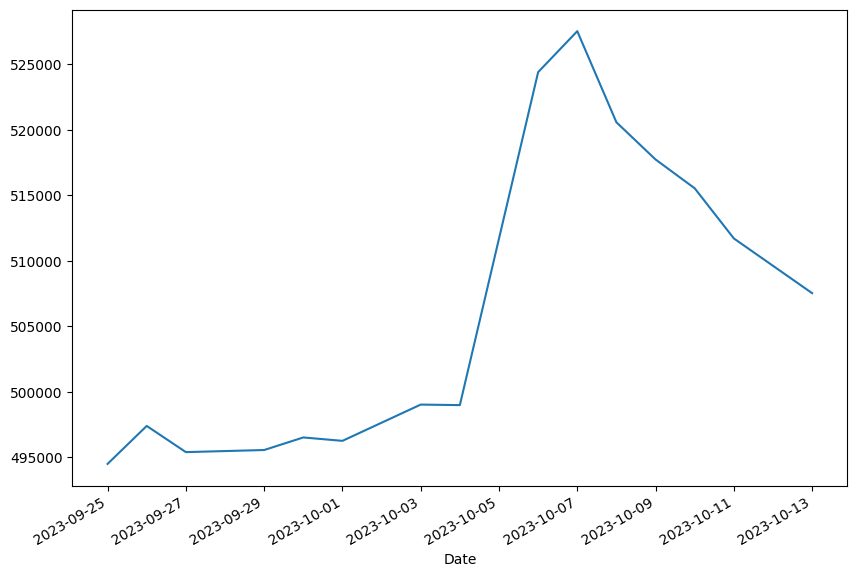

In [65]:
start_jalali = jdatetime.date.fromgregorian(date=pd.to_datetime(start)).strftime('%Y-%m-%d')
end_jalali = jdatetime.date.fromgregorian(date=pd.to_datetime(end)).strftime('%Y-%m-%d')

df_usd = fpy.Get_USD_RIAL(start_date = start_jalali, end_date = end_jalali,\
                          ignore_date = False, show_weekday = True, double_date = True)
df_usd.set_index('Date', inplace=True)
rial = df_usd["Close"]
plt.figure(figsize=(10, 7))
rial.plot()

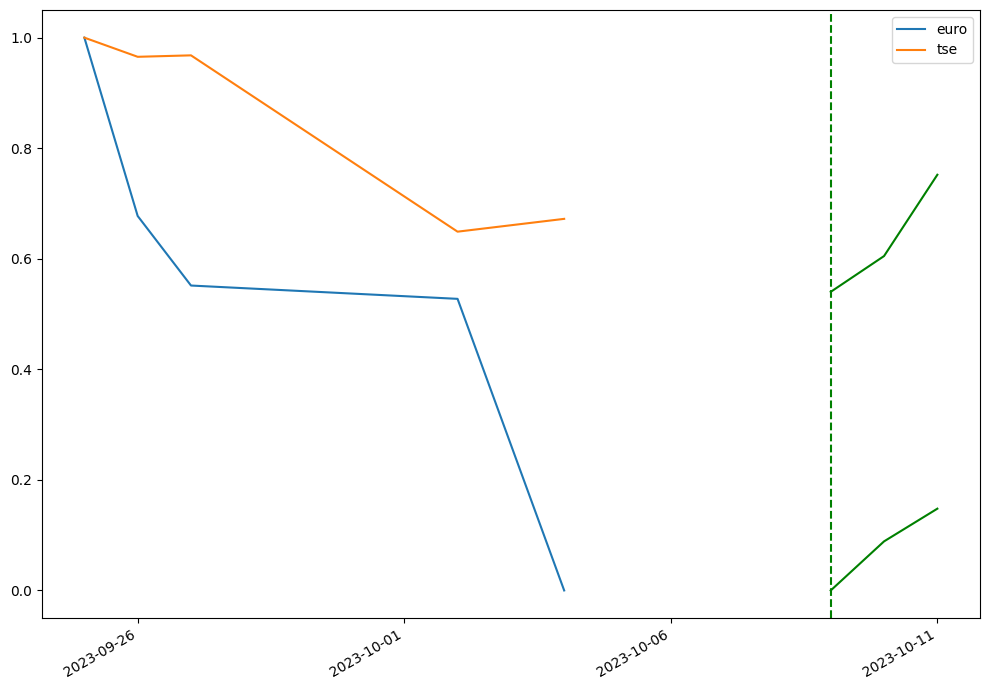

In [66]:
# 1) Make sure both are 1-D Series (squeeze 1-col DataFrames)
if isinstance(euro, pd.DataFrame):
    # if came from yfinance, you can also do: euro = euro['Close']
    euro = euro.squeeze("columns")          # or: euro = euro.iloc[:, 0]
if isinstance(tse, pd.DataFrame):
    tse = tse.squeeze("columns")            # or: tse = tse.iloc[:, 0]

# 2) Standardize indices: tz-naive DatetimeIndex
euro.index = pd.to_datetime(euro.index).tz_localize(None)
tse.index  = pd.to_datetime(tse.index).tz_localize(None)

# 3) Align on dates and build the DataFrame
df = pd.concat(
    [euro.rename('euro'), tse.rename('tse')],
    axis=1, join='inner'                    # use 'outer' for union of dates
).sort_index()

# 4) Safe Min–Max normalization
rng = df.max() - df.min()
rng = rng.replace(0, np.nan)                # avoid divide-by-zero
df_normalized = (df - df.min()) / rng
df_normalized = df_normalized.dropna()

# 5) Split and plot
split_ts = pd.to_datetime(split_date)
mask_before = df_normalized.index < split_ts
mask_after  = df_normalized.index >= split_ts

plt.figure(figsize=(10, 7))
for col in df_normalized.columns:
    # before split_date: default colors + label
    plt.plot(df_normalized.index[mask_before],
             df_normalized.loc[mask_before, col],
             label=col)
    # after split_date: green
    plt.plot(df_normalized.index[mask_after],
             df_normalized.loc[mask_after, col],
             color='green')

plt.axvline(split_ts, color='g', linestyle='--')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()